# Your Name Here: Zachary Hull

# A3 LogisticRegression, Multi-layer Perceptron (MLP)

## 1. Load data and perform general EDA (3+2+1+3+6 = 15pts)

### 1.1 import libraries: numpy, matplotlib.pyplot and pandas. (1+1+1 = 3pts)

You can import other libraries below as needed in any block.

In [3]:
# TODO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 1.2 import the data to a pandas dataframe and show the count of rows and columns (2pts)

In [4]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
from google.colab import drive
drive.mount('/content/drive')

# TODO
from google.colab import drive

csv_name = '/content/drive/MyDrive/Wine_Quality_Data.csv'
with open(csv_name, 'r') as file:
  df = pd.read_csv(csv_name)

print(df)
print(df.shape)

Mounted at /content/drive
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

 

### 1.3 Show if any column has null values. (1pt)

In [5]:
# TODO
null_df = df.isnull().any()
print(null_df)

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
color                   False
dtype: bool


### 1.4 We will use the 'quality' column as our target label. Print the count of each label in the dataset (in percentage). Mention which quality scores are among top 3 by their counts. (3pts)

In [6]:
# TODO
percent_df = df['quality'].value_counts(normalize=True)
print(percent_df)
print("6, 5, and 7 are the top 3 by counts")

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64
6, 5, and 7 are the top 3 by counts


### 1.5 Observe the correlation matrix for the columns. Name the pairs of columns with highest positive and highest negative correlations. (2+4 = 6pts) 

You can import and use seaborn here to visualize correlation matrix in a heatmap.

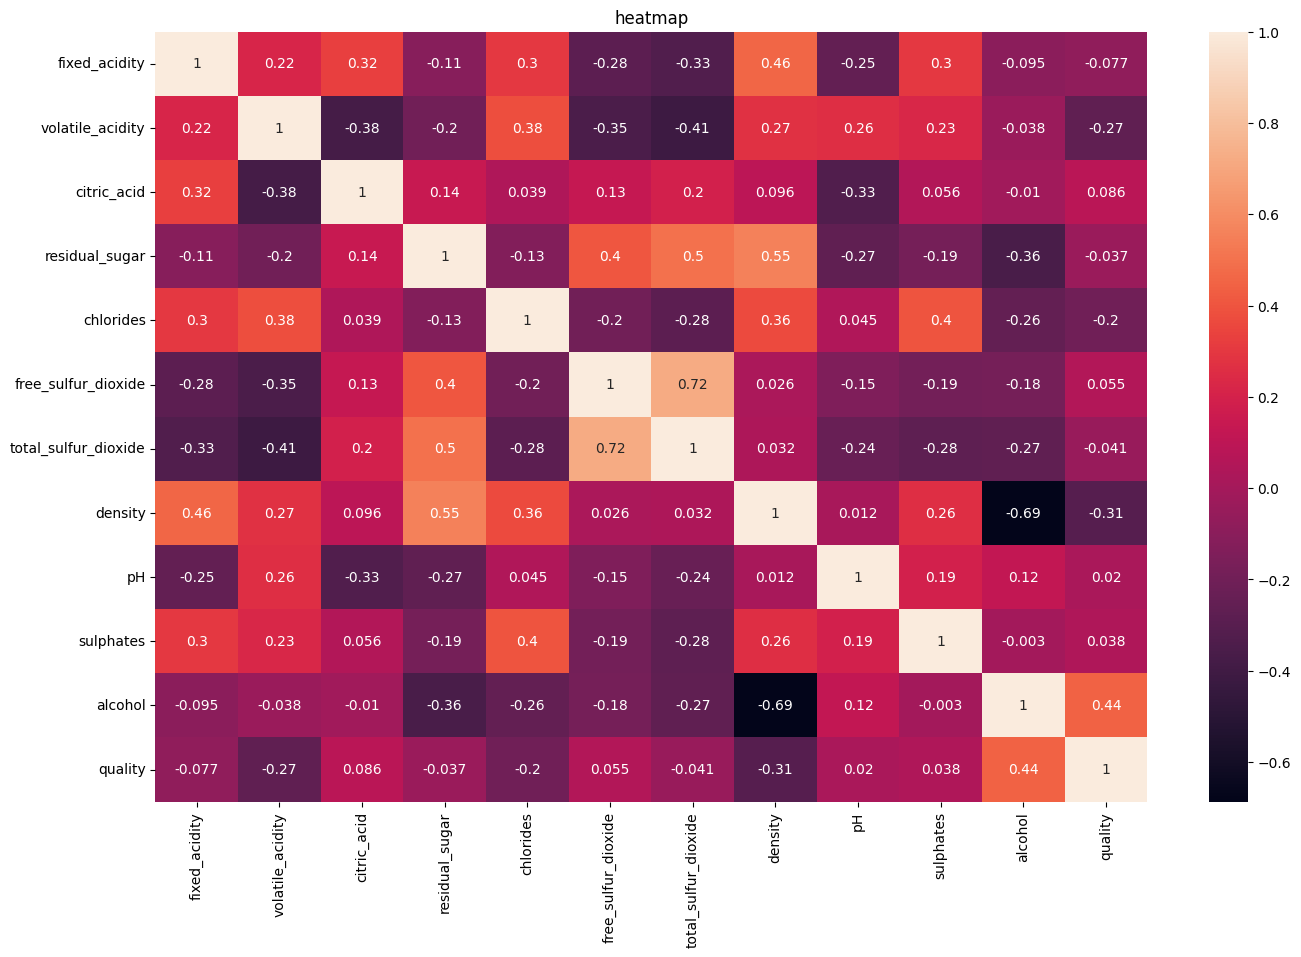

In [7]:
# TODO
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.title("heatmap")
plt.show()
#The pair with the highest positive correlation is 'total_sulfur_dioxide' and 'free_sulfur_dioxide'. The pair with the highest negative correlation is 'density' and 'alcohol'

## 2. Feature Selection and Preprocessing (2+2+3+3 = 10pts)

### 2.1 Drop the 'color' attribute from the dataframe. (2pts)

In [8]:
# TODO
df = df.drop(['color'], axis=1)

### 2.2 Assign the 'quality' column to target label y, and all other columns to attribute matrix X (1+1 = 2pts)

In [9]:
# TODO
y = df['quality']
rest_df = df.drop(['quality'], axis=1)
X = rest_df.to_numpy()
y = y.to_numpy()
print(y)
print(X)

[5 5 5 ... 6 7 6]
[[ 7.4   0.7   0.   ...  3.51  0.56  9.4 ]
 [ 7.8   0.88  0.   ...  3.2   0.68  9.8 ]
 [ 7.8   0.76  0.04 ...  3.26  0.65  9.8 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


### 2.3 Use scikitlearn's Standard Scaler to scale the feature matrix X. (3pts)

In [10]:
# TODO
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_X = scale.fit_transform(X)


### 2.4 Split Dataset into Training and Test set. (3 pts)
Use 80:20 split for training and test. Also use stratified sampling to ensure balanced dataset.

In [11]:
# TODO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## 3. Logistic Regression from scratch (10+10+10+25+20 = 75pts)


In this section, you will write a logistic regression algorithm from scratch using python and numpy. You will first write some helper functions for transforming label encoding to one-hot encoding, for measuring the cross-entropy loss and predicting labels from test data. These functions will later be used in the logistic regression training and testing.   

### 3.1 The target label in our dataset is the 'quality' column. It consists of categorical values, label-encoded with 7 values in the range [3-9]. To perform a multiclass logistic regression, you need a function that takes a label matrix and converts it to One-hot encoded labels. (10pts)

Write the function below following the docstring. 

In [12]:
def onehot(y):

    """
    Converts an array of labels to one-hot encoding.

    Parameters:
    -----------
    y : numpy.ndarray
        An array of labels. It must have a shape of (n_samples, ).

    Returns:
    --------
    numpy.ndarray
        A matrix of one-hot encoding. It has a shape of (n_samples, n_classes).
    """
    
    # TODO
    unique_y = np.unique(y)
    y_encode = np.zeros((y.shape[0], unique_y.shape[0]))

    for i, row in enumerate(y):
      index = np.where(unique_y == row)[0][0]
      y_encode[i, index] = 1
  
    return y_encode

print(onehot(y))

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 3.2 For multi-class classification, you also need to measure cross-entropy loss. Cross-entropy loss is measured by the following formula:
$\text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^n y_{ij} \log \hat{y}_{ij}$

Write a function that takes two matrices: one matrix of true labels $y_{ij}$, and one matrix of the predicted labels by your model $\hat{y}_{ij}$ (you are about to write the model function soon below), and returns the computed loss. **(10pts)**


In [13]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and predicted labels.

    Parameters
    ----------
    y_true : numpy array
        Array of true labels with shape (m, n_classes).
    y_pred : numpy array
        Array of predicted labels with shape (m, n_classes).

    Returns
    -------
    float
        Cross-entropy loss between y_true and y_pred.

    Notes
    -----
    This function assumes that the labels are one-hot encoded.
    """
    
    # TODO
    N = y_true.shape[0]
    cross = -1/N * (np.sum(y_true * np.log(y_pred + 1e-15)))
    return cross

### 3.3 Write a function for softmax activation to compute probabilities from the linear score $z_i$. Softmax function uses the following formula:
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}} , \text{for } i=1,2,3,...,k $$
where $z_i$ is the linear layer score for i-th input.   

**(10pts)**

In [14]:
def softmax(scores):
    """
    Compute the softmax of the given scores.

    Parameters:
    -----------
    scores : numpy.ndarray
        A 2D numpy array of shape (m, n), where m is the number of samples and n is the number of classes.

    Returns:
    --------
    probs : numpy.ndarray
        A 2D numpy array of shape (m, n) containing the probabilities of each sample belonging to each class.
    """
       
    # TODO
    e_z = np.exp(scores)
    sum_score = np.sum(e_z, axis=1, keepdims=True)
    softmax = e_z / sum_score
    return softmax

### 3.4 Model development (20+5 = 25pts)

**3.4.1** Write a function for the logistic regression algorithm. You will use the functions you have written above in this module. Recall that with gradient descent optimization, the computation loop goes as:
For each epoch:
1. Compute $scores = X_{train} W + b$ 
2. Compute probability = softmax(scores)
3. Compute Cross-entropy Loss
4. Compute gradients of the loss with respect to the weights and bias.

    Partial derivative of Loss with respect to Weight matrix:
    $$\frac{\partial L}{\partial W} = -\frac{1}{m} X^T \left(y - \hat{y}\right)$$

    Partial derivative of Loss with respect to Bias matrix:
    $$\frac{\partial L}{\partial b_j} = -\frac{1}{m} \sum_{i=1}^m \left(y_{ij} - p_{ij}\right) $$

5. Update the weights and biases
    $$ W = W - (learning\ rate * weight\ gradient)  $$
    $$ b = b - (learning\ rate * weight\ gradient)  $$

**(20pts)**

In [15]:
def logistic_regression(X_train, y_train, ):
    """
    Performs logistic regression using softmax activation and gradient descent optimizer to classify the input data.

    Parameters:
    -----------
    X_train : numpy.ndarray
        The input training data of shape (num_samples, num_features).
    y_train : numpy.ndarray
        The training labels of shape (num_samples,).

    Returns:
    --------
    W : numpy.ndarray
        The learned weights of shape (num_features, num_classes).
    b : numpy.ndarray
        The learned bias of shape (1, num_classes).
    loss_list : list
        The list of loss values at each epoch during training.
    """

    # get the number of samples and features from X_train (2pts)
    # TODO
    samples, features = X_train.shape
    
    # convert training labels to one-hot encoded labels (2pts)
    # TODO
    OHE = onehot(y_train)

    # get the number of target classes from y_train (2pts)
    # TODO
    target = OHE.shape[1]

    # initialize the weights and bias with numpy arrays of zeros (1+1 = 2pts)
    # TODO
    W = np.zeros((features, target))
    b = np.zeros((1, target))

    # set hyperparameters (1+1 = 2pts)
    ## set a learning rate
    # TODO
    learning_rate = 0.0001

    ## set the max number of epochs you want to train for
    # TODO
    epochs = 1000

    ## initialize a list to store the loss values (1pt)
    # TODO
    loss_list = []
    
    '''
    Write a for loop over epochs.
    In each epoch:
        compute the score for each class, 
        compute the softmax probabilities, 
        compute the cross-entropy loss, 
        compute the gradients of the loss with respect to the weights and bias, 
        update the weights and bias using the gradients and the learning rate.
    '''
    # (9pts)
    # TODO
    for i in range(epochs):
        # compute the score (Z) for each class. 
        # TODO
        scores = np.dot(X_train, W) + b

        # calculate the softmax probabilities
        # TODO
        probabilities = softmax(scores)

        # compute the cross-entropy loss
        # TODO
        loss = cross_entropy_loss(OHE, probabilities)
        loss_list.append(loss)

        # compute the gradients of the loss with respect to the weights and bias
        # TODO
        W_gradient = -(1/samples) * np.dot(np.transpose(X_train), (OHE - probabilities))
        b_gradient = -(1/samples) * np.sum((OHE - probabilities), axis=0, keepdims=True)
        
        # update the weights and bias using the gradients and the learning rate
        # TODO
        W = W - (learning_rate * W_gradient)
        b = b - (learning_rate * b_gradient)

        # For tracking progress, print the loss every 100 epochs
        # TODO
        if i % 100 == 0:
          print("At " + str(i) + " epochs, loss is: " + str(loss))

    return W, b, loss_list

**3.4.2** Now that you have the model and the helper function, train the model with your prepared training dataset. Then plot the training loss curve. **(5pts)**

At 0 epochs, loss is: 1.9459101490553063
At 100 epochs, loss is: 1.3350492166319072
At 200 epochs, loss is: 1.323608276666507
At 300 epochs, loss is: 1.3165814728631744
At 400 epochs, loss is: 1.3112009649620924
At 500 epochs, loss is: 1.3067414695082376
At 600 epochs, loss is: 1.30290834374683
At 700 epochs, loss is: 1.2995466042266925
At 800 epochs, loss is: 1.296559272240867
At 900 epochs, loss is: 1.293878491467226


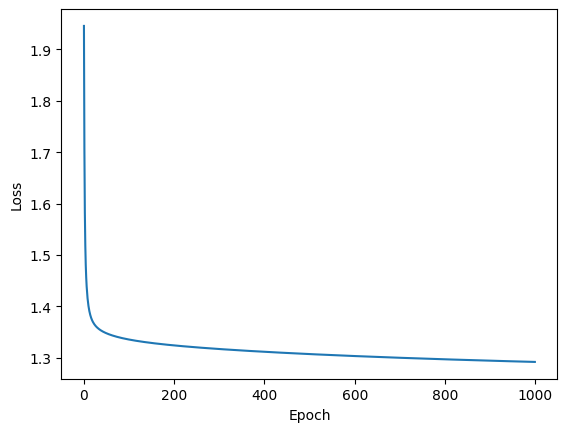

In [16]:
# train the model
# TODO
W, b, loss_list = logistic_regression(X_train, y_train)

# plot the loss curve
# TODO
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 3.5 Evaluation (10+1+4+3+2 = 20pts)

Write a function to predict the labels of X_test using the model trained above and return the predicted labels as categorical values similar to train labels. **(10pts)**

Note: By default, the predicted labels may return values within [0-6] instead of the original labels [3-9]. This can happen due to using argmax() to get label encoding from one-hot encoding when predicting test labels. You can add a simple offset to the argmax outputs of predicted labels to shift them to the range of [3-9]. This is important to note as you may see a very low accuracy even with a good model if true labels and predicted labels are not associated with the same categorical scale. 

In [17]:
def predict(X_test, W, b):
    '''
    X_test: a numpy array of testing features
    W: a numpy array of weights
    b: a numpy array of bias
    return: a numpy array of one-hot encoded labels
    '''
    # compute the scores
    # TODO
    scores = np.dot(X_test, W) + b

    # compute the probabilities
    # TODO
    probabilities = softmax(scores)

    # get the predicted labels
    # TODO
    predict = np.argmax(probabilities, axis=1)

    # return the predicted labels
    # TODO
    return predict


**3.5.1** import accuracy_score, confusion_matrix, precision_score, recall_score and f1_score from scikitlearn **(1pts)**

In [18]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

**3.5.2** Print the prediction scores on test data in terms of accuracy, precision and recall score. **(4pts)**

In [19]:
# TODO
y_pred = predict(X_test, W, b)
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: " + str(acc))
prec = precision_score(y_test, y_pred, average='macro', zero_division=1)
print("Precision score: " + str(prec))
rec = recall_score(y_test, y_pred, average='macro', zero_division=1)
print("Recall score: " + str(rec))

Accuracy score: 0.0038461538461538464
Precision score: 0.7505186721991701
Recall score: 0.22916666666666669


**3.5.3** Generate and visualize the confusion matrix. You can use seaborn heatmap to visualize a heatmap of the confusion matrix. **(3pts)**

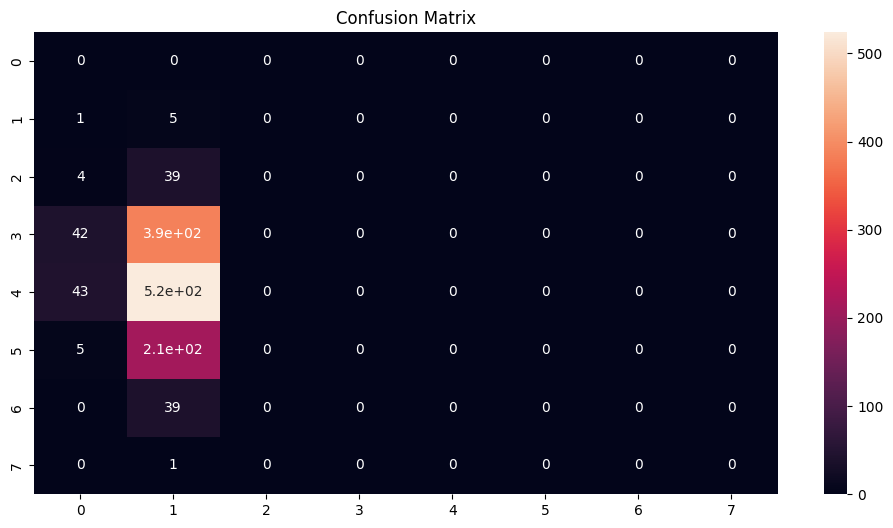

In [20]:
# TODO
con = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(con, annot=True)
plt.title("Confusion Matrix")
plt.show()

**3.5.4** Which labels seem to be harder to classify for this model? **(2pts)**

/ # TODO

###The labels that are harder to classify are 2-7 on the x-axis and 0-7 on the y-axis

## 4. Using Scikitlearn Logistic Regression (4+2+7+2 = 15pts)

### 4.1 Import LogisticRegressionCV module and create an instance of it. (4pts)
Use the following parameters:
1. 5-fold crossvalidation, 
2. lbfgs solver, 
3. run for 1000 iterations 
4. use 'multinomial' for choosing softmax classifier  

In [21]:
# TODO
from sklearn.linear_model import LogisticRegressionCV
logregcv = LogisticRegressionCV(cv=5, solver='lbfgs', max_iter=1000, multi_class='multinomial')

### 4.2 Train the model and predict the labels for test set. (2pts) 

In [30]:
# TODO
logregcv.fit(X_train, y_train)
y_pred2 = logregcv.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

### 4.3 Compute the accuracy, precision, recall and F1 scores. Also visualize the confusion matrix. (1+1+1+1+3 =7pts) 

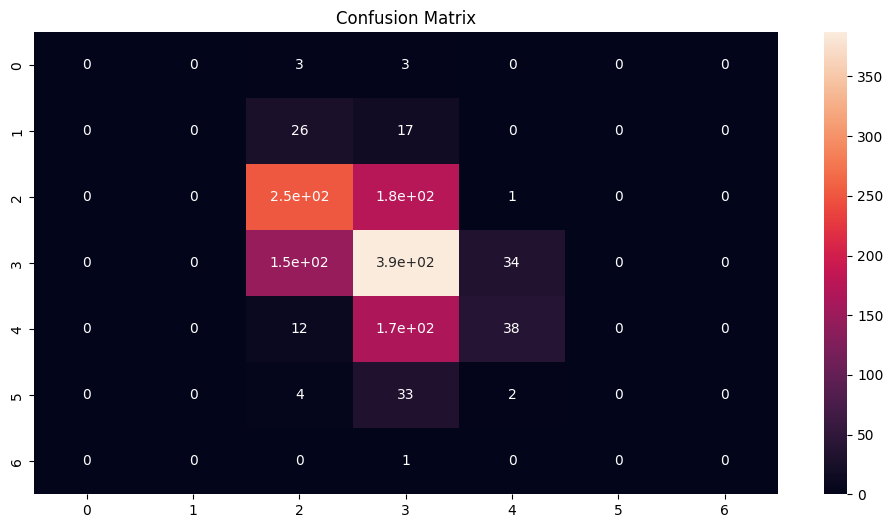

In [31]:
# TODO
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2, average='macro', zero_division=1)
rec2 = recall_score(y_test, y_pred2, average='macro', zero_division=1)
f1s = f1_score(y_test, y_pred2, average='macro', zero_division=1)
con2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(12, 6))
sns.heatmap(con2, annot=True)
plt.title("Confusion Matrix")
plt.show()

### 4.4 Did your previous model (built from scratch) and the model from scikitlearn library produced similar evaluation scores? (2pts)

Explain (in <100 words) the similarity and dissimilarity in score. What changed, what didn't, and why?

/ # TODO The model built from scratch had different evaluation scores to the model from scikitlearn. In the model built from scratch, the scores were further to the left and the shape was different

## 5. Using Scikitlearn Multi-layer Perceptron (16+19 = 35pts)

### 5.1 MLP with one hidden layer and stochastic gradient descent optimizer (4+2+1+7+2 = 16pts)

**5.1.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. One hidden layer with 100 neurons, 
2. ReLu activation, 
3. Stochastic Gradient Descent solver
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

In [40]:
# TODO
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='sgd', learning_rate_init=0.0001, max_iter=1000, random_state=42)

**5.1.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [41]:
# TODO
mlp.fit(X_train, y_train)
y_pred3 = mlp.predict(X_test)

**5.1.3** Plot the loss curve **(1pt)**

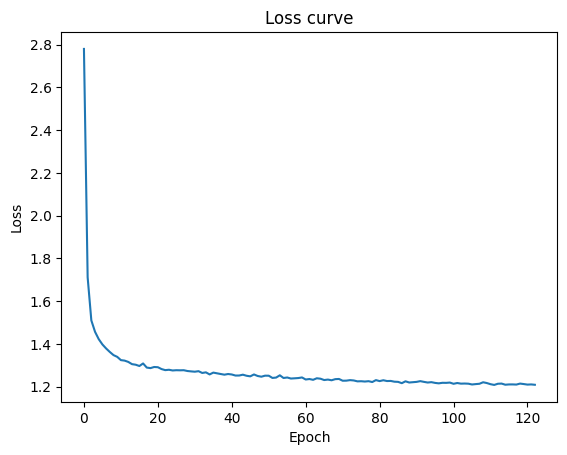

In [42]:
# TODO
plt.plot(mlp.loss_curve_)
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**5.1.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

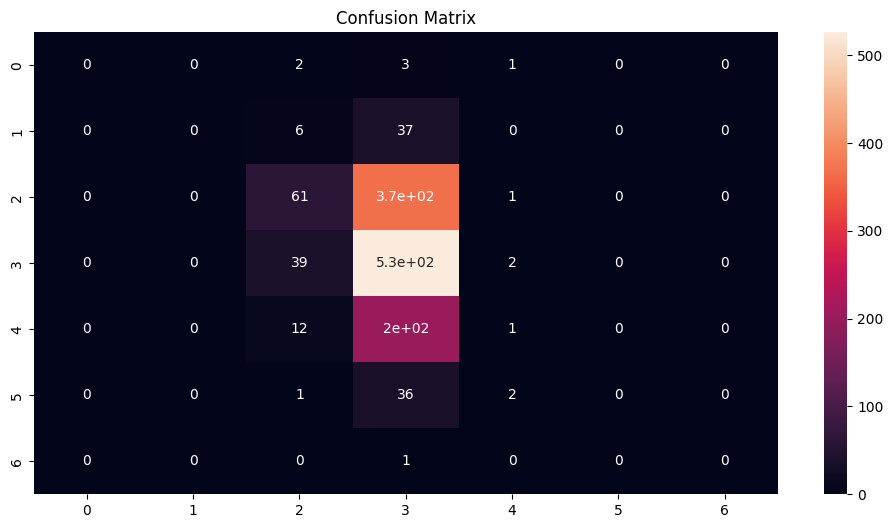

In [43]:
# TODO
acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3, average='macro', zero_division=1)
rec3 = recall_score(y_test, y_pred3, average='macro', zero_division=1)
f1s2 = f1_score(y_test, y_pred3, average='macro', zero_division=1)
con3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(12, 6))
sns.heatmap(con3, annot=True)
plt.title("Confusion Matrix")
plt.show()

**5.1.5** Did you see any change in scores after using the MLP classifier?

In <100 words, describe your observation. **(2pts)**

/ # TODO
The MLP classifier produced similar results to the model built from scratch. The shape and scores were very similar, but the values are futher to the right in the MLP classifier. It is more different from the logregcv model from the library

### 5.2 MLP with two hidden layer and adam optimizer (4+2+1+7+2+3 = 19pts)

**5.2.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. **Two** hidden layers with 100 neurons, 
2. ReLu activation, 
3. Adam solver (this is an advanced optimizer which we did not cover in class. However the usage is quite straightforward)
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

(Refer to the scikitlearn documentation for clarification on the parameters)

In [44]:
# TODO
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', learning_rate_init=0.0001, max_iter=1000, random_state=42)

**5.2.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [46]:
# TODO
mlp2.fit(X_train, y_train)
y_pred4 = mlp2.predict(X_test)

**5.2.3** Plot the loss curve **(1pt)**

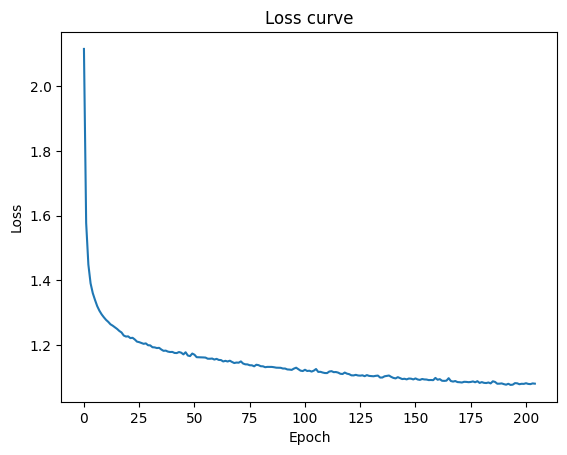

In [47]:
# TODO
plt.plot(mlp2.loss_curve_)
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**5.2.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

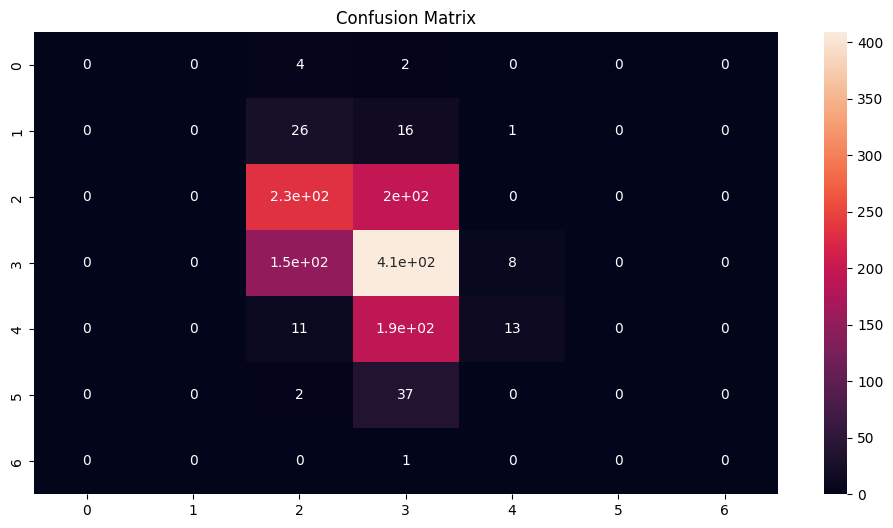

In [48]:
# TODO
acc4 = accuracy_score(y_test, y_pred3)
prec4 = precision_score(y_test, y_pred4, average='macro', zero_division=1)
rec4 = recall_score(y_test, y_pred4, average='macro', zero_division=1)
f1s3 = f1_score(y_test, y_pred4, average='macro', zero_division=1)
con4 = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(12, 6))
sns.heatmap(con4, annot=True)
plt.title("Confusion Matrix")
plt.show()

**5.2.5** Describe any difference in the loss curve from MLP with one hidden layer and MLP with two hidden layer. **(2pts)**

/ # TODO
The two MLP models have similar shapes on the loss curve, on the x-axis, the model with two hidden layes goes to 200, while it goes to 120 on the first model

**5.2.6** Did you see any change in scores between the two MLP models?

In <100 words, describe your observation. **(3pts)**

/ # TODO
There was a change in scores between the two models. The numbers are different on the two heatmaps. The shape is similar between the two, but the values are different